# Pandas

Panda is a powerful and easy-to-use library for data analysis. It has two main objects to represent data: Series and DataFrame.

## Table of Contents

1. [Imports Libraries](#Imports-Libraries)
2. [Working with Series](#Working-with-Series)
3. [Basic Operations](#Basic-Operations)
    4. <a href="#any()-and-all()">any() & all()</a>
    5. <a href="#apply()">apply()</a>
    6. <a href="#astype()">astype()</a>
    7. <a href="#copy()">copy()</a>
8. [DataFrame](#DataFrame)
    9. [Selecting Data](#Selecting-Data)
    10. [Adding Extra Columns](#Adding-extra-columns)
    11. [Operations](#Operations)
    11. <a href="#groupby()">groupby()</a>
    11. <a href="#map()">map()</a>
    12. <a href="#drop()">drop()</a>
    13. [Multi Columns Select](#Multi-Columns-Select)
    14. [Controling Display Options](#Controling-display-options)
    15. [Filtering](#Filtering)
    16. <a href="#scatter_matrix()">scatter_matrix()</a>
17. [Reading Data from CSV/TSV Files](#Reading-Data-From-CSV/TSV-Files)

## Imports Libraries

In [1]:
import pandas as pd
import numpy as np

## Working with Series 

Series is an array like object.

#### pd.Series(self, data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

In [2]:
x = pd.Series([1,2,3,4,5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

Notice that generated an index for your items.

## Basic Operations

In [3]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [4]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [5]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [6]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s1 + s2

a    11
b    22
c    33
d    44
dtype: int64

In [7]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
s1 + s2

a    31
b    12
c    43
d    24
dtype: int64

In [8]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
s1 + s2

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64

In [9]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64

### any() and all()

In [10]:
larger_than_2 = x > 2
larger_than_2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [11]:
larger_than_2.any()

True

In [12]:
larger_than_2.all()

False

### apply()

In [13]:
def f(x):
    if x % 2 == 0:
        return x * 2
    else:
        return x * 3

x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

**Avoid looping over your data**

This is %%timeit results from apply() and a for loop

In [14]:
%%timeit

ds = pd.Series(range(10000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

1 loop, best of 3: 271 ms per loop


In [15]:
%%timeit

ds = pd.Series(range(10000))
ds.apply(f)

100 loops, best of 3: 9.22 ms per loop


### astype()

In [16]:
x.astype(np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

### copy()

In [17]:
y = x

In [18]:
y[0]

1

In [19]:
y[0] = 100

In [20]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [21]:
x

0    100
1      2
2      3
3      4
4      5
dtype: int64

**Avoid using copy (if you can) to save memory**

In [22]:
y = x.copy()
x[0] = 1
print(x,y, sep='\n')

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    100
1      2
2      3
3      4
4      5
dtype: int64


In [23]:
x.describe(percentiles=[0.25,0.5,0.75])

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

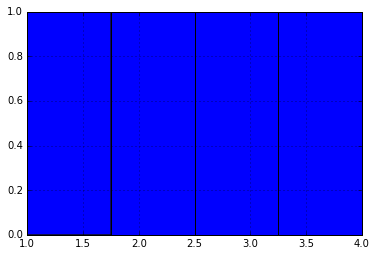

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

x = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
x.hist(bins=4)

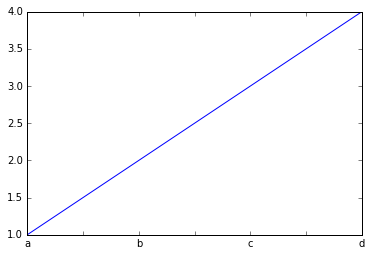

In [25]:
x.plot()

## DataFrame

#### pd.DataFrame(self, data=None, index=None, columns=None, dtype=None, copy=False)

In [26]:
data = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(data, columns=["x"])
print(df)

   x
0  1
1  2
2  3
3  4
4  5
5  6
6  7
7  8
8  9


### Selecting Data

In [27]:
df["x"]

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [28]:
df["x"][0]

1

### Adding extra columns

In [29]:
df["x_plus_2"] = df["x"] + 2
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [30]:
df["x_square"] = df["x"] ** 2
df["x_factorial"] = df["x"].apply(np.math.factorial)
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [31]:
df["is_even"] = df["x"] % 2 == 0
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,False
1,2,4,4,2,True
2,3,5,9,6,False
3,4,6,16,24,True
4,5,7,25,120,False
5,6,8,36,720,True
6,7,9,49,5040,False
7,8,10,64,40320,True
8,9,11,81,362880,False


### Operations

Some operations (like mean, std, max, min, etc) can not be used over all DataFrame. Instead, such operations are applied either columns or rows.

In [32]:
df.mean() # == df.mean(axis='index')

x                  5.000000
x_plus_2           7.000000
x_square          31.666667
x_factorial    45457.000000
is_even            0.444444
dtype: float64

In [33]:
df.mean(axis='columns') # The mean will be computed for all rows ('along the columns')

0        1.2
1        2.6
2        4.6
3       10.2
4       31.4
5      154.2
6     1021.0
7     8080.6
8    72596.2
dtype: float64

### apply()

There is a difference between the method **apply()** in series and DataFrames. In DataFrames, the apply methods works for each column, instead of for the whole DataFrame. The result can be a single value or a new series.

In [34]:
df = pd.DataFrame({
        'a': [1,2,3,4],
        'b': [5,6,7,8]
    })
df

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [35]:
def second_largest(df):
    def second_largest_by_column(values):
        return values.sort_values(ascending=False).iloc[1]
    return df.apply(second_largest_by_column)
print(second_largest(df))

a    3
b    7
dtype: int64


In [36]:
def standardize(df):
    def standardize_c(values):
        return (values - values.mean())/values.std(ddof=0)
    return df.apply(standardize_c)
print(standardize(df))

          a         b
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641


### applymap()

On the other hand, if you want to apply a function for each value, you must use **applymap()**.

In [37]:
def add_one(df):
    def add_1(value):
        return value+1
    return df.applymap(add_1)
print(add_one(df))

   a  b
0  2  6
1  3  7
2  4  8
3  5  9


### Working with Series and DataFrames Together

#### Adding a series to a square DataFrame

In [38]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df, df+s, sep='\n\n')

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


#### Adding a Series to a one-row DataFrame

In [39]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
print(df, df+s, sep='\n\n')

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [40]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print(df, df+s, sep='\n\n') # df+s == df.add(s, axis='columns')

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [41]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print(df, df.add(s, axis='index'), sep='\n\n')

    0
0  10
1  20
2  30
3  40

    0
0  11
1  22
2  33
3  44


#### Adding when DataFrame column names match Series index

In [42]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df, df+s, sep='\n\n')

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


#### Adding when DataFrame column names don't match Series index

In [43]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})
print(df, df+s, sep='\n\n')

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### groupby()

In [44]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [47]:
grouped_data = example_df.groupby('even')
print(grouped_data.groups)

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [52]:
first_even = example_df.groupby('even', as_index=False).first()
print(first_even['even'])

0    False
1     True
Name: even, dtype: bool


In [48]:
# Multiple Columns
grouped_data = example_df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [49]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [50]:
# Limit columns in result
grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame
print(grouped_data.sum()['value'])
print()

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int64

even
False     5
True     16
Name: value, dtype: int64


### map()

In [32]:
df["odd_even"] = df["is_even"].map({False:"odd", True:"even"})
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,False,odd
1,2,4,4,2,True,even
2,3,5,9,6,False,odd
3,4,6,16,24,True,even
4,5,7,25,120,False,odd
5,6,8,36,720,True,even
6,7,9,49,5040,False,odd
7,8,10,64,40320,True,even
8,9,11,81,362880,False,odd


### drop()

In [33]:
df = df.drop("is_even", 1)
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


### Multi Columns Select

In [34]:
df[["x", "odd_even"]] # Pay atemption to double brackets

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


### Controlling display options

In [35]:
pd.options.display.max_columns = 60
pd.options.display.max_rows = 20
pd.options.display.notebook_repr_html = False
df

   x  x_plus_2  x_square  x_factorial odd_even
0  1         3         1            1      odd
1  2         4         4            2     even
2  3         5         9            6      odd
3  4         6        16           24     even
4  5         7        25          120      odd
5  6         8        36          720     even
6  7         9        49         5040      odd
7  8        10        64        40320     even
8  9        11        81       362880      odd

### Filtering

In [36]:
df[df["odd_even"] == "odd"]

   x  x_plus_2  x_square  x_factorial odd_even
0  1         3         1            1      odd
2  3         5         9            6      odd
4  5         7        25          120      odd
6  7         9        49         5040      odd
8  9        11        81       362880      odd

In [37]:
df[df.odd_even == "even"]

   x  x_plus_2  x_square  x_factorial odd_even
1  2         4         4            2     even
3  4         6        16           24     even
5  6         8        36          720     even
7  8        10        64        40320     even

#### Chaining Filters

**| OR**

In [38]:
df[(df.odd_even == "even") | (df.x_square < 20)]

   x  x_plus_2  x_square  x_factorial odd_even
0  1         3         1            1      odd
1  2         4         4            2     even
2  3         5         9            6      odd
3  4         6        16           24     even
5  6         8        36          720     even
7  8        10        64        40320     even

**& And**

In [39]:
df[(df.odd_even == "even") & (df.x_square < 20)]

   x  x_plus_2  x_square  x_factorial odd_even
1  2         4         4            2     even
3  4         6        16           24     even

**Furter Chaining**

In [40]:
df[(df.odd_even == "even") & (df.x_square < 20)]["x_plus_2"][:1] # [:n] means "return the n-first values"

1    4
Name: x_plus_2, dtype: int64

## scatter_matrix()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1103fca90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1111d19b0>]], dtype=object)

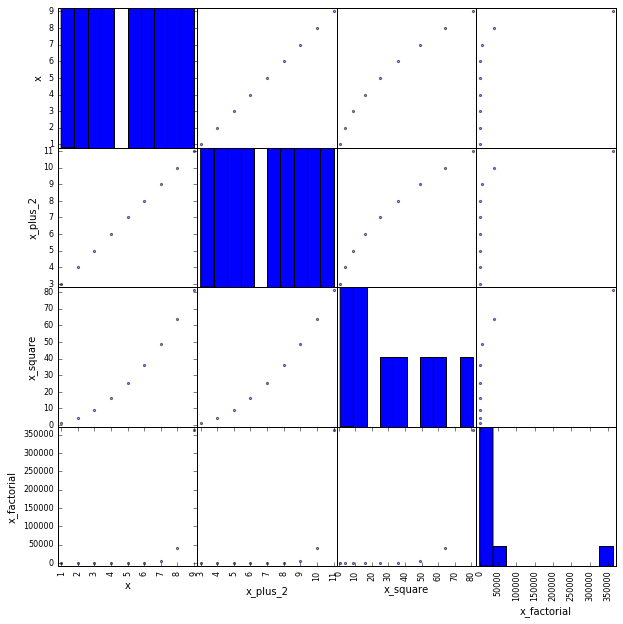

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.scatter_matrix(df, diagonal="hist", figsize=(10,10))

In [42]:
df.describe()

              x   x_plus_2   x_square    x_factorial
count  9.000000   9.000000   9.000000       9.000000
mean   5.000000   7.000000  31.666667   45457.000000
std    2.738613   2.738613  28.080242  119758.341137
min    1.000000   3.000000   1.000000       1.000000
25%    3.000000   5.000000   9.000000       6.000000
50%    5.000000   7.000000  25.000000     120.000000
75%    7.000000   9.000000  49.000000    5040.000000
max    9.000000  11.000000  81.000000  362880.000000

## Reading Data From CSV/TSV Files

In [43]:
url = "http://www.google.com/finance/historical?q=TADAWUL:TASI&output=csv"
stocks_data = pd.read_csv(url) # you can change url for a local file path
stocks_data

         ﻿Date     Open     High      Low    Close     Volume
0    27-Jun-16  6478.60  6550.20  6461.32  6464.84  236554105
1    26-Jun-16  6550.97  6547.74  6256.68  6478.60  332657358
2    23-Jun-16  6532.42  6554.19  6521.30  6550.97  199178774
3    22-Jun-16  6553.01  6585.61  6531.79  6532.42  158116439
4    21-Jun-16  6558.92  6584.97  6549.70  6553.01  146333736
5    20-Jun-16  6542.40  6572.74  6537.80  6558.92  150238728
6    19-Jun-16  6542.64  6591.69  6539.41  6542.40  171249760
7    16-Jun-16  6566.68  6572.71  6534.18  6542.64  179619196
8    15-Jun-16  6626.58  6647.17  6564.65  6566.68  265530174
9    14-Jun-16  6589.64  6626.58  6580.92  6626.58  234366648
..         ...      ...      ...      ...      ...        ...
241  13-Jul-15  9253.41  9292.91  9251.23  9269.78   95381453
242  12-Jul-15  9281.76  9353.67  9241.63  9253.41  157881546
243   9-Jul-15  9057.89  9314.44  9047.21  9281.76  199056803
244   8-Jul-15  9081.73  9081.73  9013.74  9057.89   97013066
245   7-

In [44]:
stocks_data["change_amount"] = stocks_data["Close"] - stocks_data["Open"]
stocks_data["change_percentage"] = stocks_data["change_amount"] / stocks_data["Close"]
stocks_data

         ﻿Date     Open     High      Low    Close     Volume  change_amount  \
0    27-Jun-16  6478.60  6550.20  6461.32  6464.84  236554105         -13.76   
1    26-Jun-16  6550.97  6547.74  6256.68  6478.60  332657358         -72.37   
2    23-Jun-16  6532.42  6554.19  6521.30  6550.97  199178774          18.55   
3    22-Jun-16  6553.01  6585.61  6531.79  6532.42  158116439         -20.59   
4    21-Jun-16  6558.92  6584.97  6549.70  6553.01  146333736          -5.91   
5    20-Jun-16  6542.40  6572.74  6537.80  6558.92  150238728          16.52   
6    19-Jun-16  6542.64  6591.69  6539.41  6542.40  171249760          -0.24   
7    16-Jun-16  6566.68  6572.71  6534.18  6542.64  179619196         -24.04   
8    15-Jun-16  6626.58  6647.17  6564.65  6566.68  265530174         -59.90   
9    14-Jun-16  6589.64  6626.58  6580.92  6626.58  234366648          36.94   
..         ...      ...      ...      ...      ...        ...            ...   
241  13-Jul-15  9253.41  9292.91  9251.2